**1. Datein einlesen**


In [33]:
from google.colab import files

uploaded = files.upload()


import pandas
data100 = pandas.read_excel("data100.xlsx")
data5000 = pandas.read_excel("data5000.xlsx")

Saving data100.xlsx to data100 (1).xlsx
Saving data5000.xlsx to data5000 (1).xlsx


In [107]:
data5000.head()

,label,titel
0,1,How can I find the full path to a font from it...
1,1,Get a preview JPEG of a PDF on Windows?
2,0,Continuous Integration System for a Python Cod...
3,1,cx_Oracle: How do I iterate over a result set?
4,1,Using 'in' to match an attribute of Python obj...


2. **Bag Of Worlds Model**

2.1 Logistische Regression

In [108]:
sentences = data5000['titel'].values
labels = data5000['label'].values

In [109]:
from sklearn.model_selection import train_test_split

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25, random_state=1000)



In [110]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

X_train.shape

(3749, 4215)

In [112]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scoretrain = classifier.score(X_train, y_train)
scoretest = classifier.score(X_test, y_test)

print("Accuracy:", scoretrain)
print("Accuracy:", scoretest)

Accuracy: 0.9402507335289411
Accuracy: 0.8928


2.2 Einfaches NN

In [113]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

In [114]:
model = models.Sequential()
model.add(layers.Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [115]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                42160     
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 42171 (164.73 KB)
Trainable params: 42171 (164.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [125]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    batch_size=32
)

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 6.4708e-04 - accuracy: 0.9997 - val_loss: 1.8101 - val_accuracy: 0.8216
Epoch 2/100
118/118 [==============================] - 1s 5ms/step - loss: 6.4656e-04 - accuracy: 0.9997 - val_loss: 1.8205 - val_accuracy: 0.8224
Epoch 3/100
118/118 [==============================] - 2s 16ms/step - loss: 6.4519e-04 - accuracy: 0.9997 - val_loss: 1.8271 - val_accuracy: 0.8240
Epoch 4/100
118/118 [==============================] - 1s 3ms/step - loss: 6.4445e-04 - accuracy: 0.9997 - val_loss: 1.8391 - val_accuracy: 0.8224
Epoch 5/100
118/118 [==============================] - 2s 18ms/step - loss: 6.4293e-04 - accuracy: 0.9997 - val_loss: 1.8501 - val_accuracy: 0.8232
Epoch 6/100
118/118 [==============================] - 1s 6ms/step - loss: 6.4154e-04 - accuracy: 0.9997 - val_loss: 1.8616 - val_accuracy: 0.8232
Epoch 7/100
118/118 [==============================] - 1s 6ms/step - loss: 6.4108e-04 - accuracy: 0.9997 - val_loss:

In [126]:
_, train_accuracy = model.evaluate(X_train, y_train)
_, test_accuracy = model.evaluate(X_test, y_test)
print(f'Training accuracy: {train_accuracy:.4f}')
print(f'Testing accuracy: {test_accuracy:.4f}')

40/40 [==============================] - 0s 2ms/step - loss: 2.6273 - accuracy: 0.8176
Training accuracy: 0.9997
Testing accuracy: 0.8176


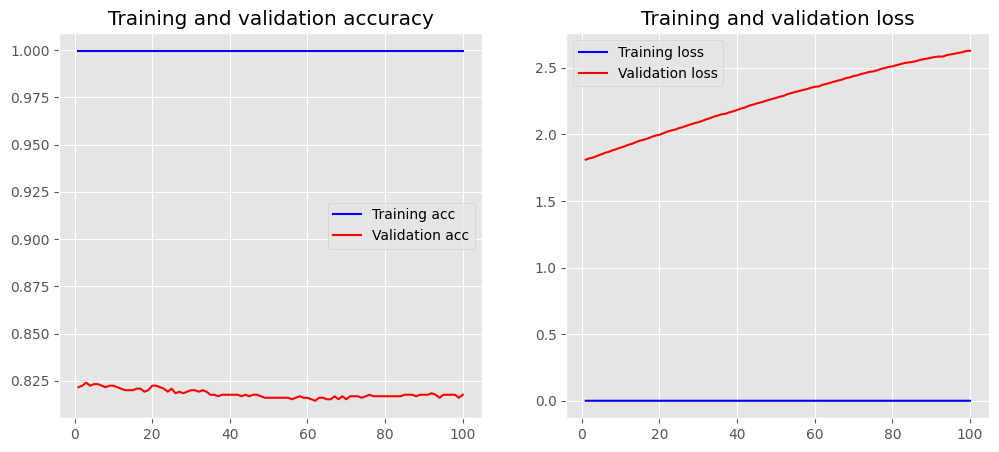

In [127]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [128]:
from keras.backend import clear_session
clear_session()

**3. World Embeddings**

3.1 Embedding Layer

In [134]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

print(sentences_train[2])
print(X_train[2])

How do I upgrade python 2.5.2 to python 2.6rc2 on ubuntu linux 8.04?
[5, 12, 8, 1449, 1, 34, 156, 34, 4, 1, 34, 2090, 18, 659, 190, 341, 1131]


In [135]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

print(sentences_train[2])
print(X_train[2])

How do I upgrade python 2.5.2 to python 2.6rc2 on ubuntu linux 8.04?
[   5   12    8 1449    1   34  156   34    4    1   34 2090   18  659
  190  341 1131    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [136]:
model = models.Sequential()
model.add(
    layers.Embedding(
        input_dim=len(tokenizer.word_index) + 1,
        output_dim=50,
        input_length=100
    )
)
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [137]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/20
375/375 [==============================] - 8s 18ms/step - loss: 0.5094 - accuracy: 0.7754 - val_loss: 0.4427 - val_accuracy: 0.7768
Epoch 2/20
375/375 [==============================] - 7s 19ms/step - loss: 0.3623 - accuracy: 0.8544 - val_loss: 0.4018 - val_accuracy: 0.8680
Epoch 3/20
375/375 [==============================] - 7s 20ms/step - loss: 0.2601 - accuracy: 0.9192 - val_loss: 0.4049 - val_accuracy: 0.8744
Epoch 4/20
375/375 [==============================] - 7s 19ms/step - loss: 0.1864 - accuracy: 0.9557 - val_loss: 0.4407 - val_accuracy: 0.8712
Epoch 5/20
375/375 [==============================] - 9s 23ms/step - loss: 0.1374 - accuracy: 0.9792 - val_loss: 0.4693 - val_accuracy: 0.8696
Epoch 6/20
375/375 [==============================] - 11s 28ms/step - loss: 0.1024 - accuracy: 0.9907 - val_loss: 0.4768 - val_accuracy: 0.8640
Epoch 7/20
375/375 [==============================] - 7s 20ms/step - loss: 0.0801 - accuracy: 0.9952 - val_loss: 0.5255 - val_accuracy: 0.863

118/118 [==============================] - 2s 15ms/step - loss: 0.0177 - accuracy: 0.9973
Training Accuracy: 0.9973
40/40 [==============================] - 1s 37ms/step - loss: 0.8323 - accuracy: 0.8640
Testing Accuracy: 0.8640


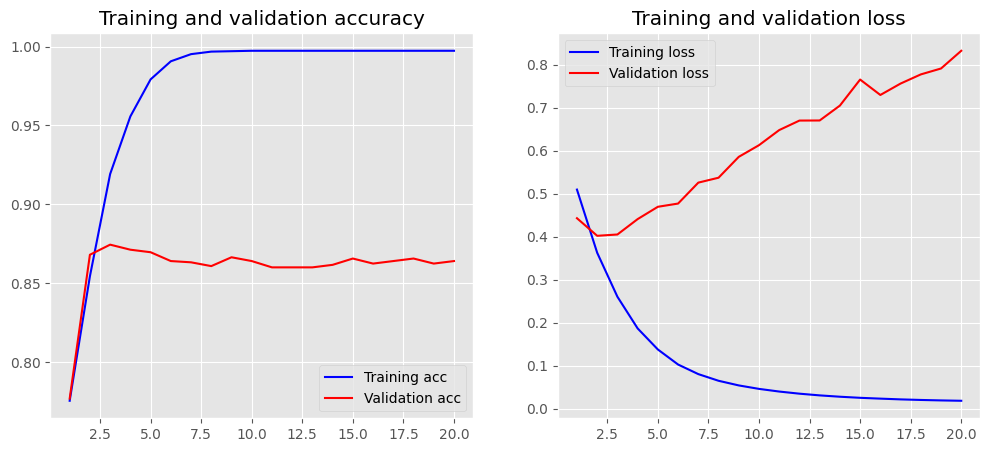

In [138]:
_, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')
_, test_accuracy = model.evaluate(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy:.4f}')
plot_history(history)

3.1 Mit PoolingLayer

Epoch 1/20
375/375 [==============================] - 7s 15ms/step - loss: 0.4762 - accuracy: 0.8031 - val_loss: 0.3844 - val_accuracy: 0.8688
Epoch 2/20
375/375 [==============================] - 7s 20ms/step - loss: 0.2830 - accuracy: 0.8933 - val_loss: 0.3155 - val_accuracy: 0.8944
Epoch 3/20
375/375 [==============================] - 7s 19ms/step - loss: 0.1776 - accuracy: 0.9288 - val_loss: 0.3412 - val_accuracy: 0.8976
Epoch 4/20
375/375 [==============================] - 5s 14ms/step - loss: 0.1113 - accuracy: 0.9645 - val_loss: 0.3822 - val_accuracy: 0.8936
Epoch 5/20
375/375 [==============================] - 10s 28ms/step - loss: 0.0668 - accuracy: 0.9835 - val_loss: 0.4353 - val_accuracy: 0.8888
Epoch 6/20
375/375 [==============================] - 9s 25ms/step - loss: 0.0402 - accuracy: 0.9925 - val_loss: 0.4819 - val_accuracy: 0.8832
Epoch 7/20
375/375 [==============================] - 5s 15ms/step - loss: 0.0247 - accuracy: 0.9965 - val_loss: 0.5366 - val_accuracy: 0.875

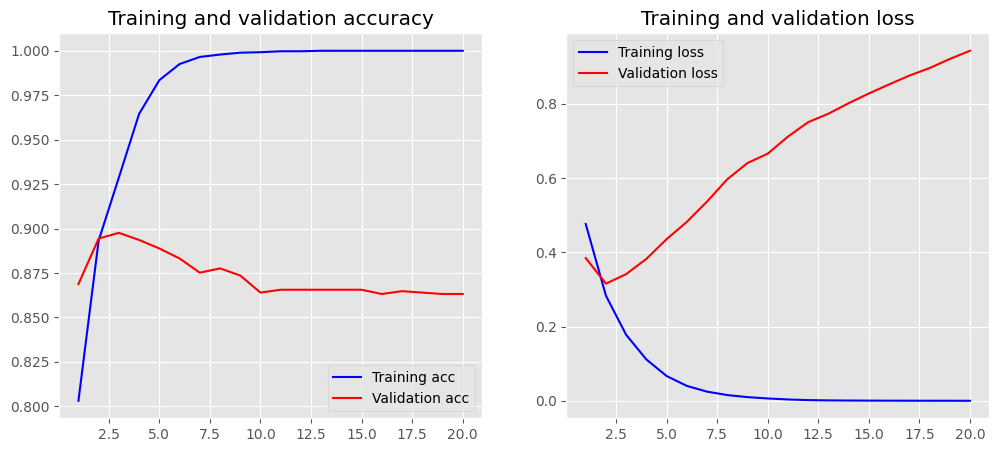

In [139]:
model = models.Sequential()
model.add(
    layers.Embedding(
        input_dim=len(tokenizer.word_index) + 1,
        output_dim=50,
        input_length=100
    )
)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    batch_size=10
)

_, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')
_, test_accuracy = model.evaluate(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy:.4f}')
plot_history(history)

3.2 Pretrained Word Embeddings

In [141]:
import requests
import zipfile

def get_data(url, fn):
  response = requests.get(url)
  f = open(fn, 'wb')
  f.write(response.content)
  f.close()

def extract_data(fn):
  with zipfile.ZipFile(fn, 'r') as zf:
    zf.extractall()

GLOVE_URL = 'http://nlp.stanford.edu/data/glove.6B.zip'

GLOVE_FILE_NAME = 'glove.zip'

get_data(GLOVE_URL, GLOVE_FILE_NAME)
extract_data(GLOVE_FILE_NAME)

In [142]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
  vocab_size = len(word_index) + 1
  embedding_matrix = np.zeros((vocab_size, embedding_dim))

  with open(filepath) as f:
    for line in f:
      word, *vector = line.split()
      if word in word_index:
        idx = word_index[word]
        embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

  return embedding_matrix

In [143]:
embedding_matrix = create_embedding_matrix('glove.6B.50d.txt', tokenizer.word_index, 50)

In [144]:
embedding_matrix.shape

(4307, 50)

In [146]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / (len(tokenizer.word_index) + 1)

0.8121662410030184

In [148]:
model = models.Sequential()
model.add(layers.Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=50,
    input_length=100,
    weights=[embedding_matrix],
    trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Epoch 1/50
375/375 [==============================] - 5s 8ms/step - loss: 0.5235 - accuracy: 0.7757 - val_loss: 0.5033 - val_accuracy: 0.7760
Epoch 2/50
375/375 [==============================] - 12s 33ms/step - loss: 0.4898 - accuracy: 0.7831 - val_loss: 0.4766 - val_accuracy: 0.7912
Epoch 3/50
375/375 [==============================] - 3s 8ms/step - loss: 0.4687 - accuracy: 0.7946 - val_loss: 0.4609 - val_accuracy: 0.7928
Epoch 4/50
375/375 [==============================] - 4s 10ms/step - loss: 0.4547 - accuracy: 0.8037 - val_loss: 0.4466 - val_accuracy: 0.8008
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.4478 - accuracy: 0.8144 - val_loss: 0.4373 - val_accuracy: 0.8240
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.4383 - accuracy: 0.8240 - val_loss: 0.4479 - val_accuracy: 0.8128
Epoch 7/50
375/375 [==============================] - 8s 21ms/step - loss: 0.4355 - accuracy: 0.8253 - val_loss: 0.4284 - val_accuracy: 0.8184
Ep

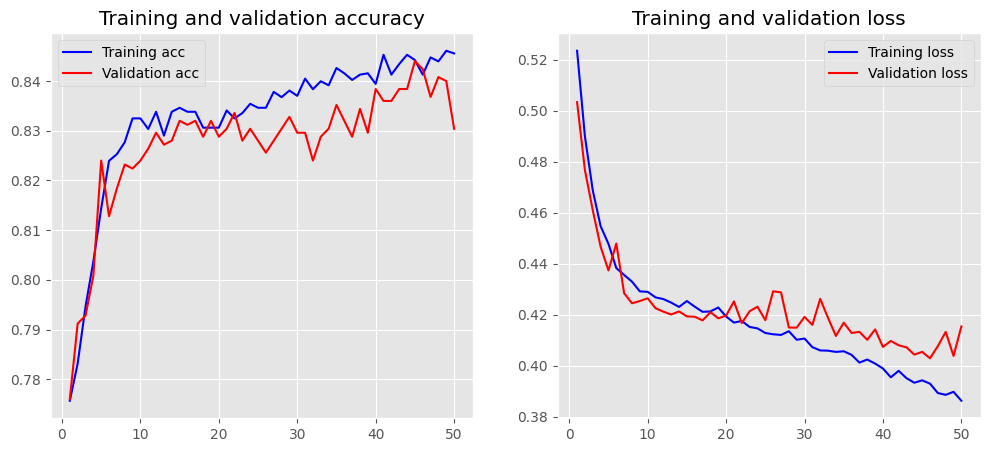

In [151]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=10
)

_, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')
_, test_accuracy = model.evaluate(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy:.4f}')
plot_history(history)

In [152]:
model = models.Sequential()
model.add(layers.Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=50,
    input_length=100,
    weights=[embedding_matrix],
    trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Epoch 1/50
375/375 [==============================] - 8s 18ms/step - loss: 0.4987 - accuracy: 0.7863 - val_loss: 0.4383 - val_accuracy: 0.8080
Epoch 2/50
375/375 [==============================] - 6s 16ms/step - loss: 0.3891 - accuracy: 0.8544 - val_loss: 0.3636 - val_accuracy: 0.8672
Epoch 3/50
375/375 [==============================] - 7s 18ms/step - loss: 0.3172 - accuracy: 0.8808 - val_loss: 0.3412 - val_accuracy: 0.8640
Epoch 4/50
375/375 [==============================] - 13s 34ms/step - loss: 0.2633 - accuracy: 0.9008 - val_loss: 0.3271 - val_accuracy: 0.8744
Epoch 5/50
375/375 [==============================] - 9s 23ms/step - loss: 0.2187 - accuracy: 0.9133 - val_loss: 0.3287 - val_accuracy: 0.8768
Epoch 6/50
375/375 [==============================] - 9s 23ms/step - loss: 0.1812 - accuracy: 0.9338 - val_loss: 0.3383 - val_accuracy: 0.8824
Epoch 7/50
375/375 [==============================] - 11s 29ms/step - loss: 0.1473 - accuracy: 0.9461 - val_loss: 0.3503 - val_accuracy: 0.87

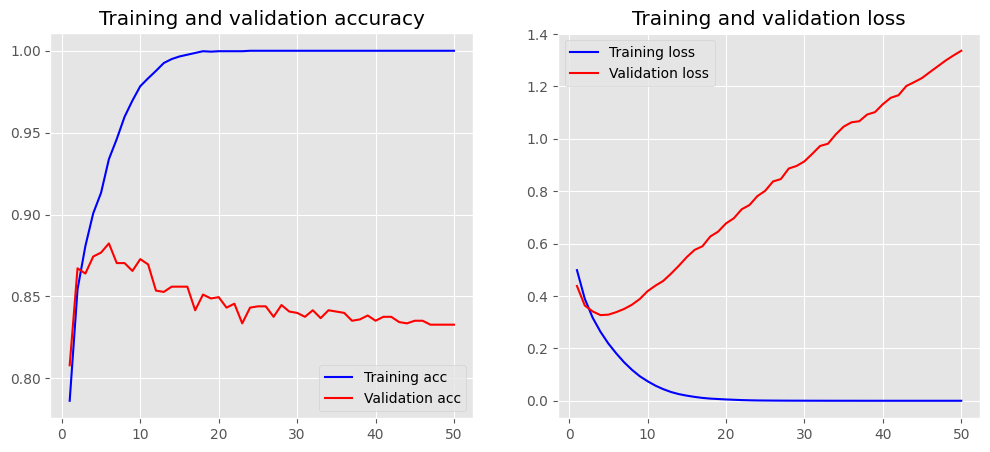

In [153]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=10
)

_, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')
_, test_accuracy = model.evaluate(X_test, y_test)
print(f'Testing Accuracy: {test_accuracy:.4f}')
plot_history(history)